In [ ]:
# Install: pip install git+https://github.com/seokhyung-lee/color-code-stim.git@sdqc

In [1]:
from color_code_stim import ColorCode, NoiseModel
%load_ext autoreload
%autoreload 2

## Space multiplexing circuit

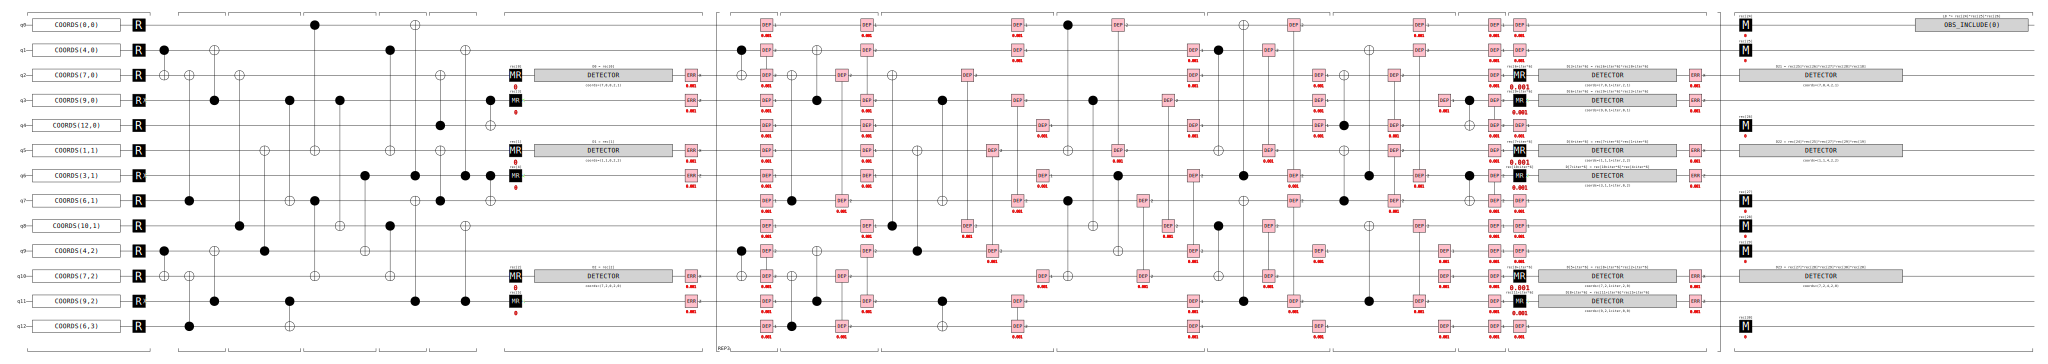

In [123]:
noise = NoiseModel(
    reset_anc_X=1e-3,  # reset flip error on X-type anc qubit
    reset_anc_Z=1e-3,  # reset flip error on Z-type anc qubit
    meas_anc_X=1e-3,  # measurement flip error on X-type anc qubit
    meas_anc_Z=1e-3,  # measurement flip error on Z-type anc qubit
    cnot=1e-3,  # depol2 after CNOT
    depol1_after_cnot=1e-3,  # depol1 on each qubit after CNOT
    idle_during_cnot=1e-3,  # depol1 on idling qubits during CNOT
    idle_during_meas=0,  # depol1 on idling qubits during measurement
    initial_data_qubit_depol=1e-3,  # depol on data qubits after initial syndrome extraction
)

noise = NoiseModel.uniform_circuit_noise(1e-3)

cc = ColorCode(
    d=3,
    rounds=4,  # T + 1
    circuit_type="tri",
    noise_model=noise,
    temp_bdry_type="z",
    perfect_logical_initialization=True,
    perfect_logical_measurement=True,
    perfect_first_syndrome_extraction=True,
)

cc.circuit.diagram("timeline-svg")

In [124]:
cc.simulate(100000)

np.int64(948)

## Superdense circuit

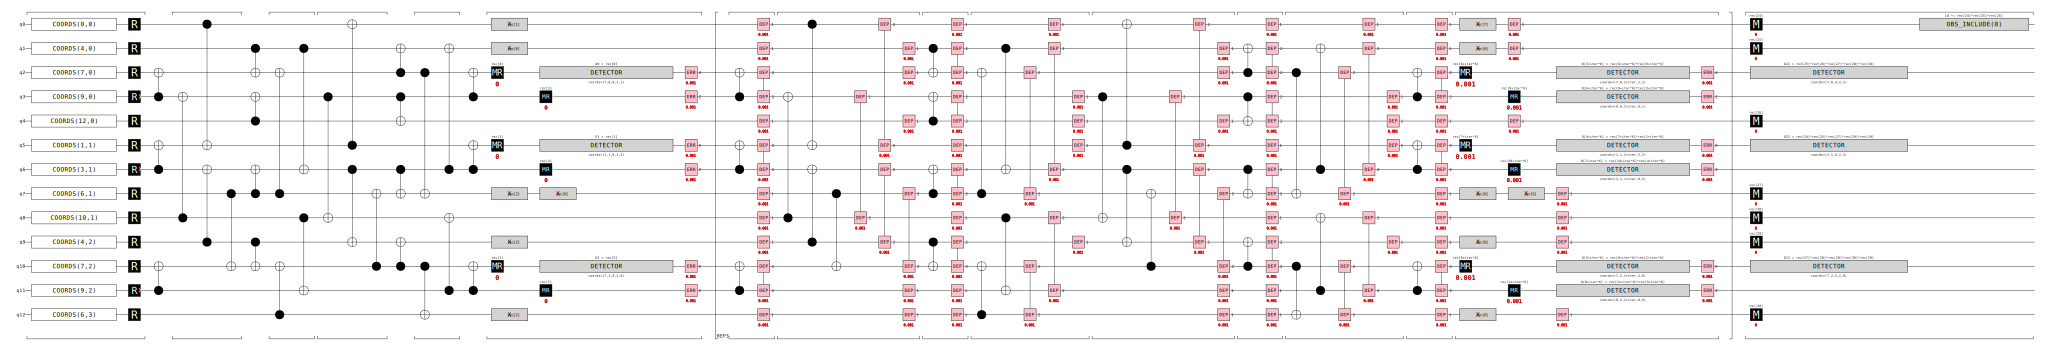

In [131]:
noise = NoiseModel(
    reset_anc_X=1e-3,  # reset flip error on X-type anc qubit
    reset_anc_Z=1e-3,  # reset flip error on Z-type anc qubit
    meas_anc_X=1e-3,  # measurement flip error on X-type anc qubit
    meas_anc_Z=1e-3,  # measurement flip error on Z-type anc qubit
    cnot=1e-3,  # depol2 after CNOT
    depol1_after_cnot=1e-3,  # depol1 on each qubit after CNOT
    idle_during_cnot=1e-3,  # depol1 on idling qubits during CNOT
    idle_during_meas=0,  # depol1 on idling qubits during measurement
    initial_data_qubit_depol=1e-3,  # depol on data qubits after initial syndrome extraction
)

noise = NoiseModel.uniform_circuit_noise(1e-3)

cc2 = ColorCode(
    d=3,
    rounds=4,  # T + 1
    circuit_type="tri",
    noise_model=noise,
    temp_bdry_type="z",
    superdense_circuit=True,
    perfect_logical_initialization=True,
    perfect_logical_measurement=True,
    perfect_first_syndrome_extraction=True,
)

cc2.circuit.diagram("timeline-svg")

In [132]:
cc2.simulate(100000)

np.int64(457)

In [144]:
noise = NoiseModel.uniform_circuit_noise(1e-3)

for d in range(3, 10, 2):
    for superdense_circuit in [True, False]:
        cc = ColorCode(
            d=d,
            rounds=d + 1,  # T + 1
            circuit_type="tri",
            noise_model=noise,
            temp_bdry_type="z",
            superdense_circuit=superdense_circuit,
            perfect_logical_initialization=True,
            perfect_logical_measurement=True,
            perfect_first_syndrome_extraction=True,
        )
        print(cc.simulate(100000))

455
902
242
256
128
69
46
21
